In [1]:
from dataloader import *
from model import *
from train import *
from utils import *

from matplotlib import pyplot as plt
import numpy as np

import torchvision.transforms as transforms

In [2]:
assert torch.cuda.is_available()

## Data Exploration

In [3]:
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Resize(size=(224, 224)),
                transforms.Normalize((0.485, 0.456, 0.406),
                                    (0.229, 0.224, 0.225)),
            ])
            
train_loader = get_loader(
    root_folder="data/flickr8k/images/",
    annotation_file="data/flickr8k/captions.txt",
    transform=transform
)

In [19]:
batch = next(iter(train_loader))

imgs, caps = batch

print(imgs.shape, caps.shape)
print(train_loader.dataset.df)

torch.Size([64, 3, 224, 224]) torch.Size([28, 64])
                           image  \
0      1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg   
...                          ...   
40450   997722733_0cb5439472.jpg   
40451   997722733_0cb5439472.jpg   
40452   997722733_0cb5439472.jpg   
40453   997722733_0cb5439472.jpg   
40454   997722733_0cb5439472.jpg   

                                                 caption  
0      A child in a pink dress is climbing up a set o...  
1                  A girl going into a wooden building .  
2       A little girl climbing into a wooden playhouse .  
3      A little girl climbing the stairs to her playh...  
4      A little girl in a pink dress going into a woo...  
...                                                  ...  
40450           A man in a pink shirt climbs a rock face  
40451           A man is rock climbing high 

### Data Samples

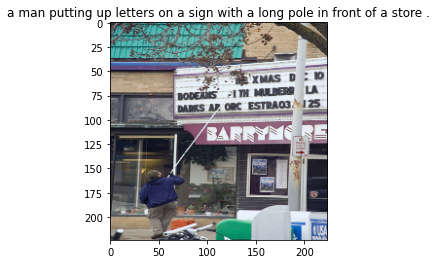

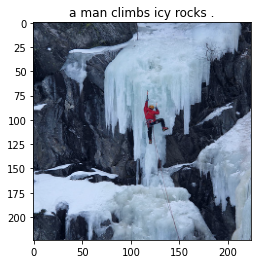

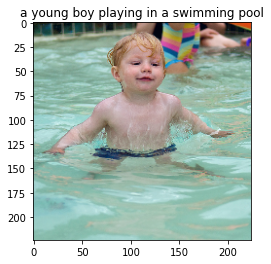

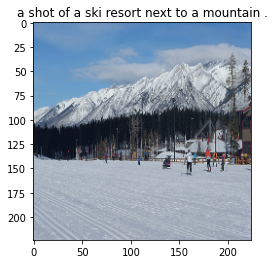

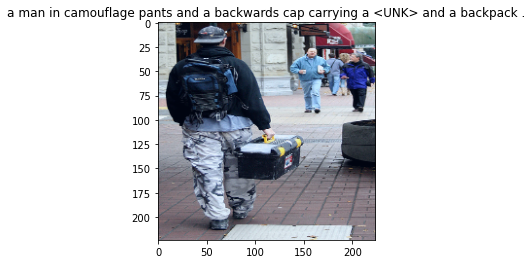

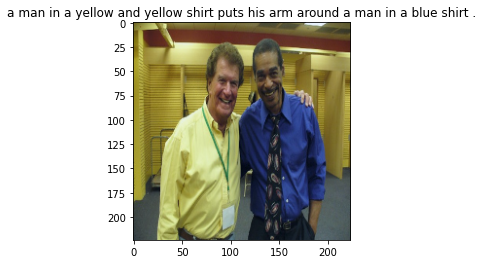

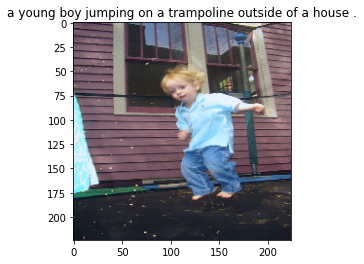

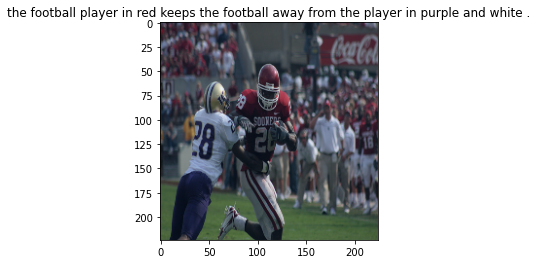

In [5]:
def show_example(dataloader, num_examples=8):
    images, captions = next(iter(dataloader))
    for idx, img in enumerate(images):
        if idx == num_examples:
            break

        vector = [ captions[row, idx].item() for row in range(len(captions)) ]  #   get all words tokenize of this image
        label_vector = [dataloader.dataset.vocab.itos[word] for word in vector] #   convert tokenizes to words
        eos_index = label_vector.index('<EOS>')     #   find index of <EOS>
        label_vector = label_vector[1 : eos_index]  #   remove <SOS> and <EOS>

        plt.imshow(norm(np.transpose(img, (1, 2, 0))))
        plt.title(' '.join(label_vector))
        plt.show()

show_example(train_loader)